# HSV変換と肌色抽出

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets

%matplotlib inline

画像を入力して，HSV に変換する

In [2]:
rgb = cv2.imread("C:\\Users\\user\\Desktop\\WPy64-3830\\picture\\IMG_0921.JPG", cv2.IMREAD_COLOR)
if rgb is None:
    print(f'画像が開けませんでした．', file=sys.stderr)
    sys.exit(1)

# OpenCV では BGR の順番であることに注意！
hsv = cv2.cvtColor(rgb, cv2.COLOR_BGR2HSV)

関数 inRange の引数「**kwargs」の使い方については，

https://dev.classmethod.jp/articles/what-does-asterisk-mean-at-args/

に詳しく解説されています．可変長の辞書型引数です．

In [3]:
def inRange(**kwargs):
    lower = tuple([int(l) for l, h in kwargs.values()])
    upper = tuple([int(h) for l, h in kwargs.values()])
    binary = cv2.inRange(hsv, lowerb=lower, upperb=upper)

    fig = plt.figure(figsize=(10, 10))
    plt.imshow(binary, cmap='gray')

In [4]:
# パラメータ lower, upper を設定するスライダー
description = ["hue", "sat.", "val."]
parts = {}
for d in description:
    slider = widgets.SelectionRangeSlider(
        options=np.arange(256), index=(0, 255), description=d
    )
    slider.layout.width = "400px"

    parts[d] = slider

In [5]:
# ウィジェットを表示する
#widgets.interactive(inRange, **parts)

In [6]:
mask = cv2.inRange(hsv,(10,20,0),(20,255,255))
##mask2 = cv2.inRange(hsv,(170,255,255),(180,255,255))
##mask = cv2.bitwise_or(mask1,mask2)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

In [7]:
nLabels, labelImages, data, center = cv2.connectedComponentsWithStats(mask)

16.024131681693945


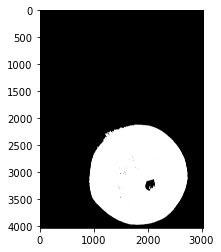

In [8]:
plt.imshow(mask,cmap="gray")
max_label = 0
max_pixels = 0
for l in range(1, nLabels):
    if data[l, 4] > 10000:
        if max_pixels < data[l, 4]:
            max_label = l
            max_pixels = data[l, 4]

newbanana = np.where(labelImages == max_label, 255, 0).astype('uint8')

h, w = hsv.shape[0], hsv.shape[1]
#print(h, w)

average = 0.0
n = 0
for y in range(h):
    for x in range(w):
        if mask[y, x] == 255:
            average += hsv[y, x, 0]
            n += 1

average /= n
print(average)

banana = rgb[data[7][1]:data[7][1]+data[7][3],data[7][0]:data[7][0]+data[7][2]].copy()
plt.imshow(newbanana,cmap="gray")

In [9]:
candidate_threshold = 10 * cv2.getTrackbarPos('region threshold', windowName[1])
candidate_index = np.where(data[:, 4] > candidate_threshold)

NameError: name 'windowName' is not defined

In [ ]:
hsv_in_mask = hsv[mask==255]#二値化された白いとこのHSVの値を取り出した。（H,S,V、の三つの値の数字が格納されています。）
print(type(hsv_in_mask), hsv_in_mask[:,0:2].shape)

In [ ]:
import pandas as pd
import seaborn as sns

df_hs = pd.DataFrame(data=hsv_in_mask[:,0:2], columns=['hue', 'sat.'], dtype='uint8')

sns.set()
sns.set_style("whitegrid")
fig_hs = sns.scatterplot(x='hue', y='sat.', data=df_hs, alpha=0.5)
fig_hs.set(xlim=(-10,190), ylim=(-10,266))

In [ ]:
lab = cv2.cvtColor(rgb, cv2.COLOR_BGR2Lab)
lab_in_mask = lab[mask==255]

df_ab = pd.DataFrame(data=lab_in_mask[:,1:3], columns=['a', 'b'], dtype='uint8')

sns.set()
sns.set_style("whitegrid")
fig_ab = sns.scatterplot(x='a', y='b', data=df_ab, alpha=0.5)
fig_ab.set(xlim=(-10,266), ylim=(-10,266), aspect='equal')